## Визуализация данных

__Автор задач: Блохин Н.В. (NVBlokhin@fa.ru)__

Материалы:
* Макрушин С.В. Лекция "Визуализация данных".
* https://numpy.org/doc/stable/reference/generated/numpy.load.html
* https://matplotlib.org/stable/gallery/text_labels_and_annotations/date.html
* https://matplotlib.org/stable/gallery/subplots_axes_and_figures/shared_axis_demo.html
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html#pandas.DataFrame.plot
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.bar.html
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.pie.html
* https://seaborn.pydata.org/examples/index.html
* https://matplotlib.org/stable/tutorials/colors/colormaps.html

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install pandas_datareader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from pandas_datareader.data import DataReader
import datetime
import os
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.dates as mdates
from seaborn import scatterplot
from seaborn import heatmap

## Задачи для совместного разбора

1. При помощи пакета `pandas_datareader` загрузите данные о ценах акций Apple с 2017-01-01 по 2018-12-31. Визуализируйте временные ряд цен акций.

In [4]:
os.environ['IEX_API_KEY'] = 'pk_a17005e3035b4edebd89da020f0f8b4b'

In [5]:
stocks = DataReader('AAPL', 'iex', datetime.date(2017, 1, 1), datetime.date(2018, 12, 31))
stocks

,open,high,low,close,volume
date,,,,,
2017-01-03,28.9500,29.0825,28.6900,29.0375,115127460.0
2017-01-04,28.9625,29.1275,28.9375,29.0050,84472464.0
2017-01-05,28.9800,29.2161,28.9525,29.1525,88774348.0
2017-01-06,29.1950,29.5400,29.1175,29.4775,127007600.0
2017-01-09,29.4875,29.8575,29.4850,29.7475,134247792.0
...,...,...,...,...,...
2018-12-24,37.0375,37.8875,36.6475,36.7075,148676928.0
2018-12-26,37.0750,39.3075,36.6800,39.2925,234330176.0
2018-12-27,38.9600,39.1925,37.5175,39.0375,212468260.0


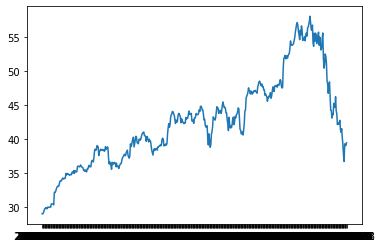

In [6]:
plt.plot(stocks.close)
plt.show()

In [7]:
plt.close()

2. Проанализируйте временной ряд максимальной цены акций на предмет выбросов.

## Лабораторная работа №5

__Данная работа подразумевает построение рисунков. В связи с этим задания, для которых не будет виден результат выполнения ячеек (получившиеся рисунки), засчитаны не будут вне зависимости от правильности решения.__

### Визуализация данных при помощи пакета `matplotlib`

__В данном блоке задач не разрешается использовать другие пакеты для визуализации, кроме `matplotlib`.__


1\. В файле `average_ratings.npy` содержится информация о среднем рейтинге 3 рецептов за период с 01.01.2019 по 30.12.2021. При помощи пакета `matplotlib` в _одной системе координат_ (на одной картинке) изобразите три временных ряда, соответствующих средним рейтингам этих рецептов. 

По горизонтальной оси располагается номер дня (0, 1, 2, ...), по вертикальной - средний рейтинг рецептов в этот день. 

Названия рецептов и их индексы в файле `average_ratings.npy`:
```
0: waffle iron french toast
1: zwetschgenkuchen bavarian plum cake
2: lime tea
```

Результатом работы является визуализация, на которой:
* добавлена подпись горизонтальной оси с текстом "Номер дня"
* добавлена подпись вертикальной оси с текстом "Средний рейтинг"
* добавлена подпись рисунка с текстом "Изменение среднего рейтинга трех рецептов"
* каждый из временных рядов имеет уникальный цвет
* добавлена легенда, на которой отображается название каждого из рецептов

_Примечание_ : для считывания файла воспользуйтесь функцией `np.load`.

In [8]:
ratings = np.load('/content/drive/MyDrive/Colab Notebooks/Notebooks/TOBD/05_visualization/average_ratings.npy')
ratings

array([[ 5.        ,  5.01310274,  5.02623981, ...,  5.52281922,
         5.53729203,  5.52281922],
       [ 7.        ,  6.97074954,  7.        , ..., 10.        ,
        10.        , 10.        ],
       [ 3.        ,  2.9968611 ,  2.99372548, ...,  2.99372548,
         2.99059315,  2.98746409]])

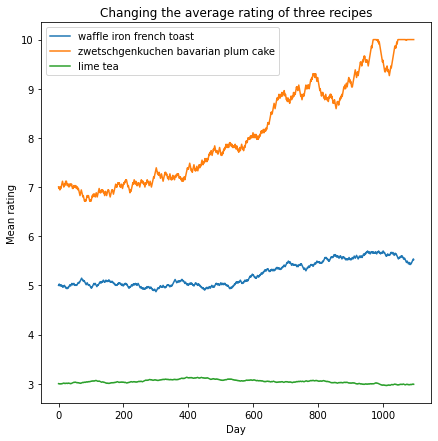

In [9]:
plt.figure(figsize=(7, 7))
plt.plot(range(0, 1095), ratings[0], label='waffle iron french toast')
plt.plot(range(0, 1095), ratings[1], label='zwetschgenkuchen bavarian plum cake')
plt.plot(range(0, 1095), ratings[2], label='lime tea')
plt.xlabel('Day')
plt.ylabel('Mean rating')
plt.title('Changing the average rating of three recipes')
plt.legend()
plt.show()

In [10]:
plt.close()

2\. Измените визуализацию, полученную в задании 1, таким образом, чтобы по горизонтальной оси отображались года, а между двумя соседними годами располагались засечки, соответствующие месяцам. Для этого создайте диапазон дат от 01.01.2019 по 30.12.2021 с шагом в один день (например, [вот так](https://pandas.pydata.org/docs/reference/api/pandas.date_range.html)) и используйте этот диапазон при вызове метода `plot`. Далее настройте `major_locator` и `minor_locator` горизонтальной оси (подробнее см. [здесь](https://matplotlib.org/stable/gallery/text_labels_and_annotations/date.html))

Примените к получившемуся рисунку цвета графиков, подписи, легенду из задания 1. Измените подпись горизонтальной оси, написав там слово "Дата".


In [11]:
date = pd.date_range(
    min(datetime.datetime(2019, 1, 1), datetime.datetime(2021, 12, 30)),
    max(datetime.datetime(2019, 1, 1), datetime.datetime(2021, 12, 30)),
    freq='D'
).tolist()
date = pd.to_datetime(date)

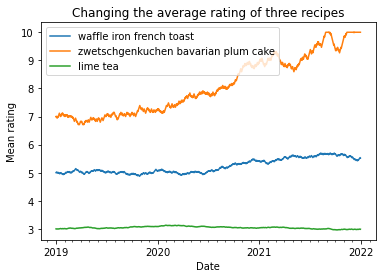

In [12]:
fig, ax = plt.subplots()
fig.figsize=(7, 7)

ax.plot(date, ratings[0], label='waffle iron french toast')
ax.plot(date, ratings[1], label='zwetschgenkuchen bavarian plum cake')
ax.plot(date, ratings[2], label='lime tea')

ax.xaxis.set_major_locator(mdates.YearLocator(1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax.xaxis.set_minor_locator(mdates.MonthLocator(interval=1))

ax.set_title('Changing the average rating of three recipes')
ax.set_xlabel('Date')
ax.set_ylabel('Mean rating')
ax.legend()
fig.show()

In [13]:
plt.close()

3\. Измените визуализацию, полученную в задании 2, разбив одну картинку на три, расположенных друг под другом. Три изображения должны иметь одну общую горизонтальную ось (каждое изображение засечки в нижней части, но значения этих засечек находятся только под самым нижним изображением). Примените к получившемуся рисунку цвета графиков, подписи, легенду из задания 2. 

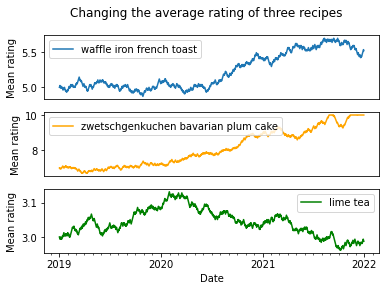

In [14]:
fig, ax = plt.subplots(3, 1)
fig.figsize=(15, 12)

ax[0].plot(date, ratings[0], label='waffle iron french toast')
ax[0].get_xaxis().set_visible(False)
ax[0].set_ylabel('Mean rating')
ax[0].legend()

ax[1].plot(date, ratings[1], color='orange',label='zwetschgenkuchen bavarian plum cake')
ax[1].get_xaxis().set_visible(False)
ax[1].set_ylabel('Mean rating')
ax[1].legend()

ax[2].plot(date, ratings[2], color='green',label='lime tea')
ax[2].xaxis.set_major_locator(mdates.YearLocator(1))
ax[2].xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax[2].xaxis.set_minor_locator(mdates.MonthLocator(interval=1))
ax[2].set_ylabel('Mean rating')
ax[2].set_xlabel('Date')
ax[2].legend()

fig.suptitle('Changing the average rating of three recipes')
fig.show()

In [15]:
plt.close()

4\. В файле `visitors.npy` представлена информация о количестве посетителей сайта в течении первых 100 дней после объявления сайтом акции. Постройте график изменения количества пользователей в зависимости от дня в двух вариантах, расположенных рядом по горизонтале. В обоих случаях изобразите график в виде ломаной, но в первом случае оставьте линейный масштаб осей, а во втором случае сделайте вертикальную ось в логарифмическом масштабе. Добавьте на обе картинки подпись над этим графиком к текстом $y(x)=\lambda e^{-\lambda x}$

Добавьте на оба изображения красную горизонтальную линию на уровне $y=100$. Добавьте на обе картинки подпись над этой линией с текстом $y(x)=100$

Добавьте на оба изображения подписи осей; горизонтальную ось подпишите текстом "Количество дней с момента акции", вертикальную - "Число посетителей".

Добавьте общий заголовок для фигуры с текстом "Изменение количества пользователей в линейном и логарифмическом масштабе".


In [16]:
visitors = np.load('/content/drive/MyDrive/Colab Notebooks/Notebooks/TOBD/05_visualization/visitors.npy')

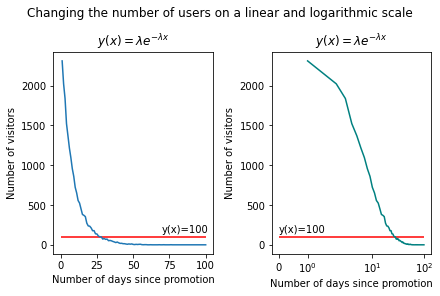

In [17]:
fig, ax = plt.subplots(1, 2, constrained_layout=True)
fig.figsize=(10, 15)

ax[0].plot(range(1, 101), visitors)
ax[0].set_title(r'$y(x)=λe^{−λx}$')
ax[0].hlines(100, 0, 100, color='red')
ax[0].text(70, 150, 'y(x)=100')
ax[0].set_xlabel('Number of days since promotion')
ax[0].set_ylabel('Number of visitors')

ax[1].plot(range(1, 101), visitors, color='teal')
ax[1].set_xscale('symlog')
ax[1].set_title(r'$y(x)=λe^{−λx}$')
ax[1].hlines(100, 0, 100, color='red')
ax[1].text(0, 150, 'y(x)=100')
ax[1].set_xlabel('Number of days since promotion')
ax[1].set_ylabel('Number of visitors')

fig.suptitle('Changing the number of users on a linear and logarithmic scale')
fig.show()

In [18]:
plt.close()

### Визуализация данных на основе структур `pandas`.

Для продолжения работы загрузите таблицы recipes и reviews (__ЛР2__)

In [19]:
reviews = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Notebooks/TOBD/05_visualization/reviews_sample.csv')
recipes = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Notebooks/TOBD/05_visualization/recipes_sample.csv')

5\. Назовем рецепты короткими, если они занимают строго меньше 5 минут; средними, если они занимают от 5 до 50 минут (не включая 50), и длинными, если они занимают от 50 минут и больше. Сгруппируйте все рецепты по данному признаку и для каждой группы посчитайте 2 величины: среднее количество шагов рецептов в группе и размер группы. При помощи методов структур `pandas` постройте столбчатую диаграмму, где каждый столбец означает группу (короткие, средние или длинные рецепты), а высота столбца обозначает среднее количество шагов рецептов в группе. Рядом по горизонтали разместите круговую диаграмму, на которой отображены размеры каждой из групп.

Добавьте следующие подписи:
* по горизонтальной оси под столбчатой диаграммой напишите "Группа рецептов"
* по вертикальной оси слева от столбчатой диаграммы напишите "Средняя длительность"
* над круговой диаграммой напишите "Размеры групп рецептов"

In [27]:
new_category = []
for i in recipes.minutes:
  if i < 5:
    new_category.append('short')
  elif i >= 5 and i < 50:
    new_category.append('medium')
  elif i >= 50:
    new_category.append('long')

recipes['duration'] = new_category
recipes

,name,id,minutes,contributor_id,submitted,n_steps,description,n_ingredients,duration
0,george s at the cove black bean soup,44123,90,35193,2002-10-25,NaN,an original recipe created by chef scott meska...,18.0,long
1,healthy for them yogurt popsicles,67664,10,91970,2003-07-26,NaN,my children and their friends ask for my homem...,NaN,medium
2,i can t believe it s spinach,38798,30,1533,2002-08-29,NaN,"these were so go, it surprised even me.",8.0,medium
3,italian gut busters,35173,45,22724,2002-07-27,NaN,my sister-in-law made these for us at a family...,NaN,medium
4,love is in the air beef fondue sauces,84797,25,4470,2004-02-23,4.0,i think a fondue is a very romantic casual din...,NaN,medium
...,...,...,...,...,...,...,...,...,...
29995,zurie s holey rustic olive and cheddar bread,267661,80,200862,2007-11-25,16.0,this is based on a french recipe but i changed...,10.0,long
29996,zwetschgenkuchen bavarian plum cake,386977,240,177443,2009-08-24,NaN,"this is a traditional fresh plum cake, thought...",11.0,long
29997,zwiebelkuchen southwest german onion cake,103312,75,161745,2004-11-03,NaN,this is a traditional late summer early fall s...,NaN,long
29998,zydeco soup,486161,60,227978,2012-08-29,NaN,this is a delicious soup that i originally fou...,NaN,long


In [28]:
recipes.groupby('duration').agg({'n_steps': 'mean', 'duration': 'count'})

,n_steps,duration
duration,,
long,11.917290,11718
medium,8.581922,17607
short,4.990431,675


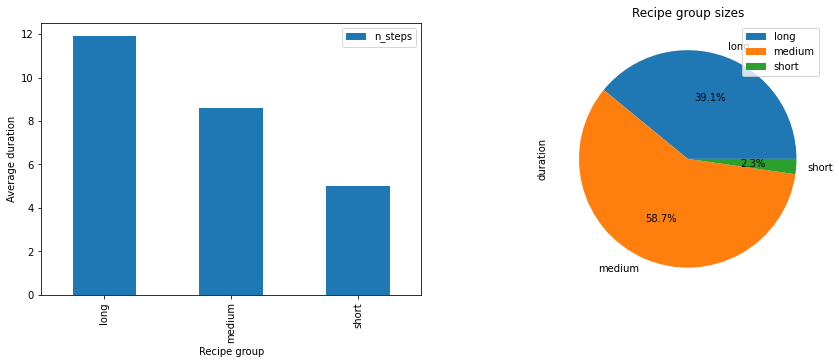

In [29]:
fig, ax = plt.subplots(ncols=2, figsize=(15, 5))

df1 = recipes.groupby('duration').agg({'n_steps': 'mean'})
df2 = recipes.groupby('duration').agg({'duration': 'count'})

df1.plot.bar(stacked=True, ax=ax[0])
df2.plot.pie(subplots=True, autopct='%1.1f%%', ax=ax[1])
ax[0].set_ylabel('Average duration')
ax[0].set_xlabel("Recipe group")
ax[1].set_title('Recipe group sizes')

fig.show()

In [30]:
plt.close()

6\. Из всего множества отзывов оставьте только те, которые были даны в 2008 и 2009 годах. Воспользовавшись возможностями метода `pd.DataFrame.plot.hist`, постройте 2 гистограммы столбца `rating`. Гистограммы должны быть расположены рядом по горизонтали. Левая гистограмма соотвествует 2008 году, правая - 2009 году. Добавьте общую подпись для рисунка с текстом "Гистограммы рейтинга отзывов в 2008 и 2009 годах". Добейтесь того, чтобы подпись вертикальной оси правого рисунка не "наезжала" на левый рисунок.

In [31]:
reviews['date'] = pd.to_datetime(reviews['date'], format='%Y-%m-%d')

In [32]:
reviews.loc[(pd.DatetimeIndex(reviews['date']).year >= 2008) & (pd.DatetimeIndex(reviews['date']).year <= 2009)].sort_values(by='date')

,Unnamed: 0,user_id,recipe_id,date,rating,review
119057,656633,119215,27208,2008-01-01,5,We added potatoes and carrots in the last hour...
38485,493452,580459,71373,2008-01-01,5,These recipe made very delicious buns. I made ...
62420,471066,27783,101591,2008-01-01,3,I used the freshly cooked sweet potatoes optio...
25879,34439,548090,112526,2008-01-01,5,These were to die for! 'Bout fell outta my cha...
21727,583472,402559,114565,2008-01-01,5,"This was great and gone in record time, thanks!"
...,...,...,...,...,...,...
64800,288169,166642,254325,2009-12-31,5,These are tasty little appetizers. Very simple...
24286,343300,131674,216688,2009-12-31,5,The orange taste really comes through in these...
39202,296011,339260,46922,2009-12-31,5,I used a small 5 pound ham so the cook time wa...
69524,793257,690173,339697,2009-12-31,2,These just weren't very good in my opinion. Th...


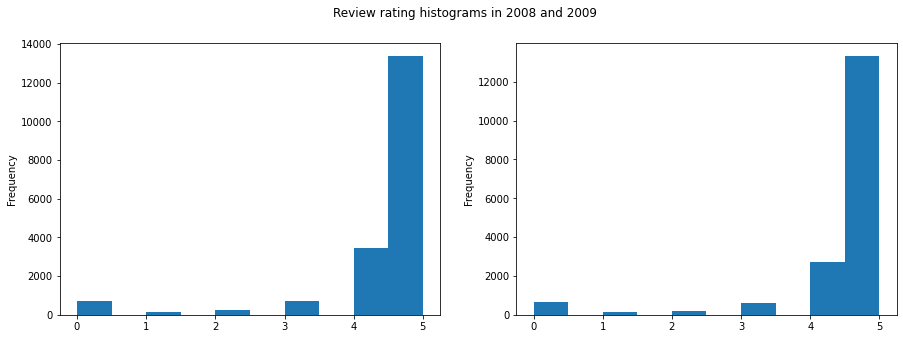

In [33]:
fig, ax = plt.subplots(ncols=2, figsize=(15, 5))

df1 = reviews.loc[(pd.DatetimeIndex(reviews['date']).year == 2008)].rating.dropna(how='any')
df2 = reviews.loc[(pd.DatetimeIndex(reviews['date']).year == 2009)].rating.dropna(how='any')

df1.plot.hist(ax=ax[0])
df2.plot.hist(ax=ax[1])

fig.suptitle('Review rating histograms in 2008 and 2009')
fig.show()

In [34]:
plt.close()

### Визуализация данных при помощи пакета `seaborn`

7\. При помощи пакета `seaborn` постройте диаграмму рассеяния двух столбцов из таблицы `recipes`: `n_steps` и `n_ingredients`. Укажите в качестве группирующей переменной (hue) категориальную длительность рецепта (короткий, средний или длинные; см. задание 5). 

Добавьте заголовок рисунка "Диаграмма рассеяния n_steps и n_ingredients"

Прокомментируйте, наблюдается ли визуально линейная зависимость между двумя этими переменными. Ответ оставьте в виде текстовой ячейки под изображением.

Text(0.5, 1.0, 'Scatterplot of n_steps and n_ingredients')

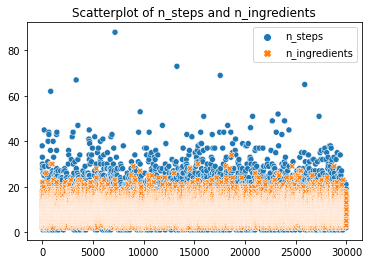

In [75]:
scatterplot(data=recipes.iloc[:, [5,7]]).set_title('Scatterplot of n_steps and n_ingredients')

**Между данными двумя переменными линейная зависимость не наблюдается**

8\. Объедините две таблицы `recipes` и `reviews` и постройте корреляционную матрицу на основе столбцов "minutes", "n_steps", "n_ingredients" и "rating". При помощи пакета `seaborn` визуализируйте полученную матрицу в виде тепловой карты (heatmap). 

Добавьте в ячейки тепловой карты подписи (значения к-та корреляции). Измените цветовую палитру на `YlOrRd`. 

Добавьте заголовок рисунка "Корреляционная матрица числовых столбцов таблиц recipes и reviews"

In [36]:
rr = recipes.merge(reviews, how='right', left_on='id', right_on='recipe_id').drop(['Unnamed: 0', 'recipe_id'], axis=1)
rr

,name,id,minutes,contributor_id,submitted,n_steps,description,n_ingredients,duration,user_id,date,rating,review
0,salmon with tomatoes,57993,50,52543,2003-04-04,NaN,this savoury dish is very popular in andalusia...,NaN,long,21752,2003-05-01,5,Last week whole sides of frozen salmon fillet ...
1,lemon cajun stir fry,142201,30,115758,2005-10-21,NaN,yum...this is a family favourite served with s...,11.0,medium,431813,2007-09-16,5,So simple and so tasty! I used a yellow capsi...
2,cottage cheese honey and cinnamon on toast,252013,27,182809,2007-09-11,6.0,wow! what a long title for such a quick treat...,4.0,medium,400708,2008-01-10,4,"Very nice breakfast HH, easy to make and yummy..."
3,belly buttons,404716,18,1492669,2009-12-21,6.0,melty hershey kisses on top of pretzels with a...,NaN,medium,2001852463,2017-12-11,5,These are a favorite for the holidays and so e...
4,double tomato soup,129396,115,214565,2005-07-11,12.0,for all tomato soup lovers. i haven't actuall...,10.0,long,95810,2008-03-14,5,Excellent soup! The tomato flavor is just gre...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
126691,melissa s lemon pepper chicken,335534,50,1015675,2008-11-06,6.0,i decided to experiment one night for dinner w...,6.0,long,1270706,2009-05-17,4,This recipe was great! I made it last night. I...
126692,should be illegal oven bbq ribs,8701,70,7503,2001-04-01,9.0,after not being able to find restaurant ribs t...,NaN,long,2282344,2012-06-03,0,This recipe is outstanding. I followed the rec...
126693,cheesy bacon bread,222001,24,156526,2007-04-11,NaN,"this is an easy appetizer to make up, and is g...",5.0,medium,689540,2008-04-08,5,"Well, we were not a crowd but it was a fabulou..."
126694,kittencal s pan seared steak stove top to ove...,354979,100,89831,2009-02-09,12.0,there has been many requests for pan seared st...,6.0,long,2000242659,2015-06-02,5,I have been a steak eater and dedicated BBQ gr...


Text(0.5, 1.0, 'Correlation matrix of numerical columns of recipes and reviews tables')

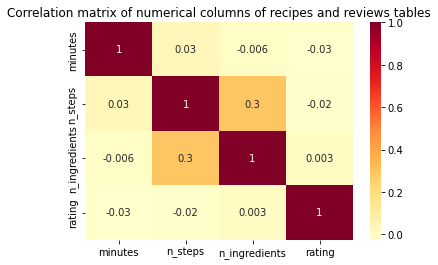

In [37]:
rr2 = rr.copy().drop(['id', 'contributor_id', 'user_id'], axis=1)
heatmap(rr2.corr(), cmap="YlOrRd", annot=True, fmt='.1g').set_title('Correlation matrix of numerical columns of recipes and reviews tables')